http://accord-framework.net/

In [2]:
#load "Paket.fsx"
Paket.Version(["Accord.MachineLearning", "3.8.0"])

In [3]:
#load "Paket.Generated.Refs.fsx"

In [4]:
open Accord.MachineLearning
open Accord.Statistics.Kernels
open Accord.MachineLearning.VectorMachines.Learning
open Accord.Math.Optimization.Losses

In [5]:
let inputs = [|[|0.0;0.0|];[|1.0;0.0|];[|0.0;1.0|];[|1.0;1.0|]|]
let outputs = [|0; 1; 1; 0|]


In [6]:
let smo = SequentialMinimalOptimization<Gaussian>()
smo.Complexity <- 100.0

let svm = smo.Learn(inputs, outputs)

In [7]:
let prediction = svm.Decide inputs

In [8]:
prediction

[|false; true; true; false|]

In [9]:
let error = (new AccuracyLoss(outputs)).Loss(prediction)
error

0.0

Visualisation
----

In [10]:
Paket.Version(["Accord.Controls", "3.8.0"])

In [11]:
#load "Paket.Generated.Refs.fsx"

In [12]:
open Accord.Controls

Don't run this on Mono - it will crash your kernel

In [13]:
ScatterplotBox.Show("Training data", inputs, outputs)

Accord.Controls.ScatterplotBox, Text: Training data

In [48]:
//TODO: plotting by other means

In [ ]:
//http://www.codesuji.com/2016/11/21/Face-Detection-with-FSharp-and-Accord-NET/

In [51]:
Paket.Version([
    "Accord.Imaging", "3.8.0"
    "Accord.Vision", "3.8.0"
])
#load "Paket.Generated.Refs.fsx"

In [52]:
open System
open Accord
open Accord.Imaging
open Accord.Vision
open Accord.Vision.Detection
open System.Drawing
open System.Drawing.Imaging
open System.IO
open Accord.MachineLearning

In [53]:
let cascade = Cascades.FaceHaarCascade()
//let cascade = Cascades.NoseHaarCascade()
let minSize = 200 
let maxSize = 2000

In [54]:
// Draw bound-box on Bitmap 
// TopLeft: (x1, y1)
// BottomRight: (x2, y2) 
let drawRectangle (bitmap:Bitmap) (x1:int) (y1:int) (x2:int) (y2:int) (lineWidth:int) (lineColor:Color) = 
    [x1..x2] 
    |> List.iter (fun x ->
        [0..lineWidth] 
        |> List.iter (fun i -> 
            bitmap.SetPixel(x, y1 + i, lineColor) 
            bitmap.SetPixel(x, y2 - i, lineColor)))

    [y1..y2] 
    |> List.iter (fun y -> 
        [0..lineWidth] 
        |> List.iter (fun i -> 
            bitmap.SetPixel(x1 + i, y, lineColor) 
            bitmap.SetPixel(x2 - i, y, lineColor)))

In [99]:
let processImage (cascade:HaarCascade) (minSize:int) (maxSize:int) (bitmap:Bitmap) =

    let copyBitmap = new Bitmap(bitmap)

    let haar = HaarObjectDetector(cascade, minSize)
    haar.MaxSize <- new Size(new Point(new Size(maxSize, maxSize)))
    let faceFinder = haar.ProcessFrame(bitmap)

    faceFinder
    |> Array.iter (fun r -> 
        drawRectangle copyBitmap r.X r.Y (r.X + r.Width) (r.Y + r.Height) 5 Color.Blue)
    
    copyBitmap

In [ ]:
//https://media.metrolatam.com/2017/10/27/strangerthings-52760e2d770bb1dad40de003bf087656-1200x600.jpg

In [59]:
#r "System.Net.dll"
open System.Net

In [100]:
let imageUrl = "https://media.metrolatam.com/2017/10/27/strangerthings-52760e2d770bb1dad40de003bf087656-1200x600.jpg"

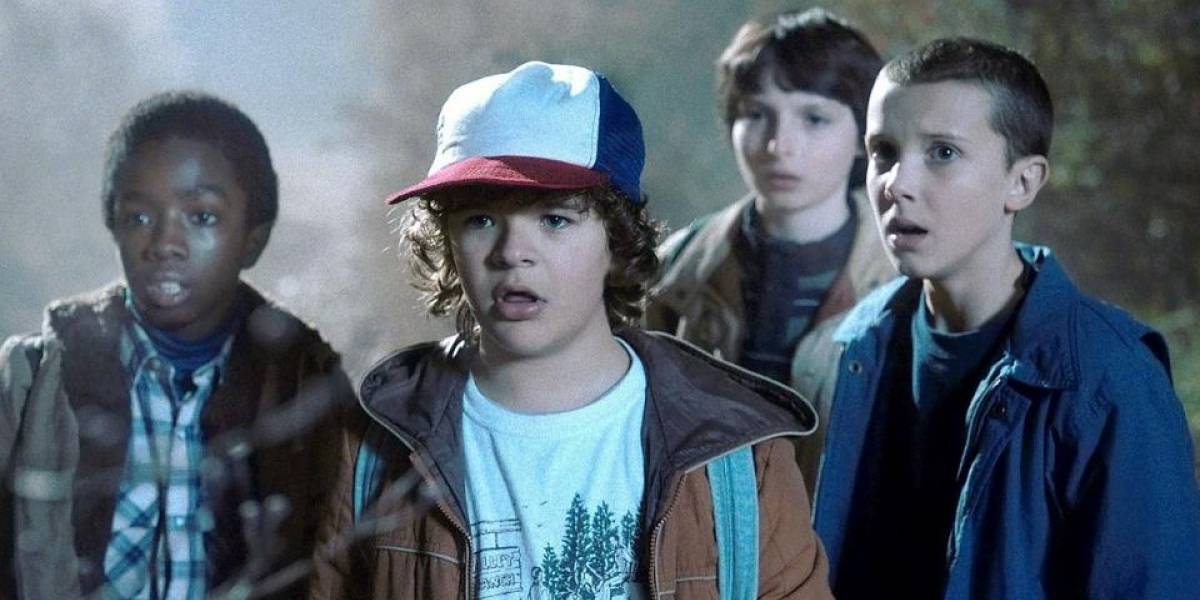

In [101]:
Util.Url imageUrl

In [102]:
let client = new WebClient()
let stream = client.OpenRead(imageUrl)
let image = new Bitmap(stream)

oppotunity for contributions!

In [103]:
Util.Image image

No overloads match for method 'Image'. The available overloads are shown below.
Possible overload: 'static member Util.Image : fileName:string -> BinaryOutput'. Type constraint mismatch. The type 
    'Bitmap'    
is not compatible with type
    'string'    
.
Possible overload: 'static member Util.Image : bytes:seq<byte> * ?contentType:string -> BinaryOutput'. Type constraint mismatch. The type 
    'Bitmap'    
is not compatible with type
    'seq<byte>'    
.

In [104]:
let ImageToBytes (img:Bitmap) =
    use stream = new MemoryStream()
    img.Save(stream, System.Drawing.Imaging.ImageFormat.Png);
    stream.ToArray()

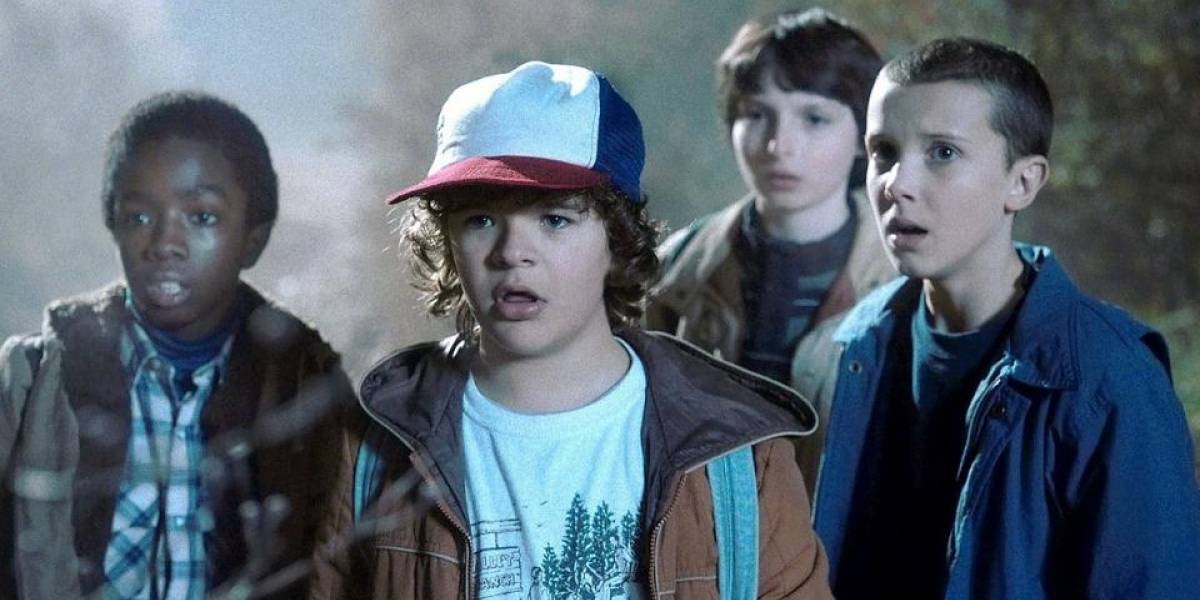

In [105]:
image |> ImageToBytes |> Util.Image

In [109]:
let faces1 = processImage cascade 10 800 image

In [112]:
let faces2 = processImage cascade 80 800 image

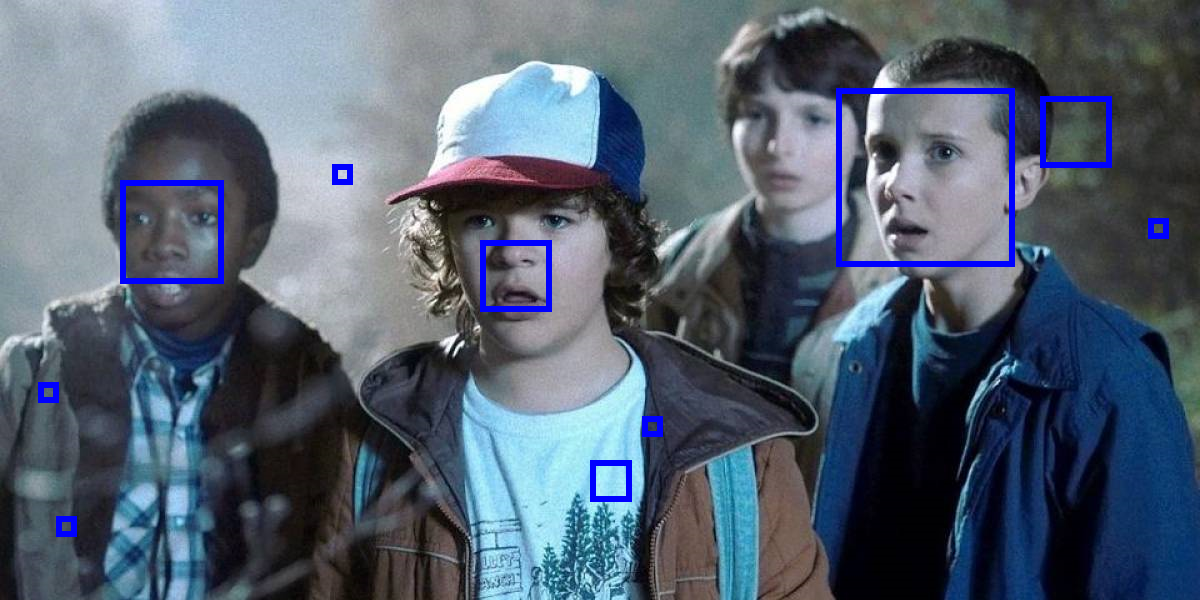

In [110]:
faces1 |> ImageToBytes |> Util.Image

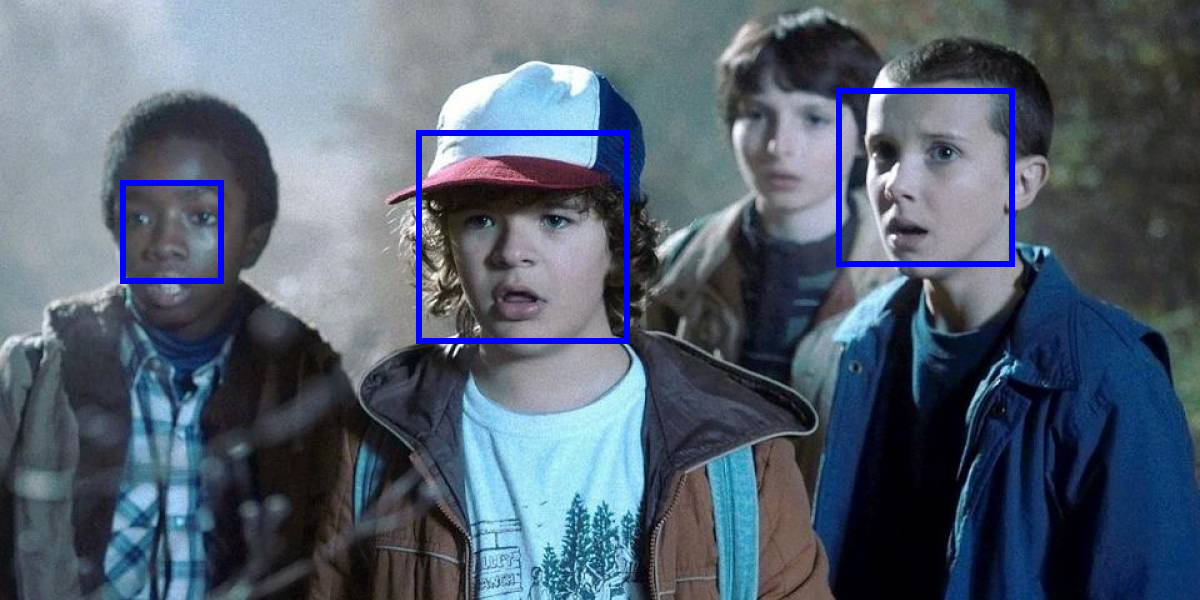

In [113]:
faces2 |> ImageToBytes |> Util.Image

In [143]:
let faces3 = processImage cascade 10 1000 image

In [ ]:
//https://azure.microsoft.com/en-gb/services/cognitive-services/face/